In [3]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy.signal.invsim import paz_to_freq_resp



Factory Poles (blue line):
(-0.063+0.052j) (-0.063-0.052j) (-190+620j) (-190-620j) (-2000+3000j) (-2000-3000j)
Observed Poles (orange line):
(-0.042+0.026j) (-0.042-0.026j) (-190+620j) (-190-620j) (-2000+3000j) (-2000-3000j)


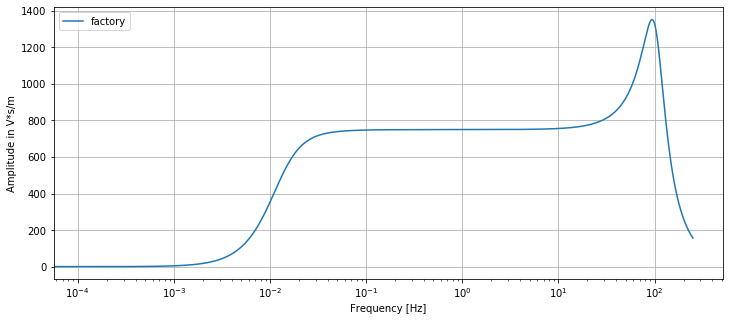



**************
The 3dB point of 530.96 for the lower corner is between

Period  70.37 [sec] 527.9193115876146
Period  69.80 [sec] 531.5733075043463
**************


Wall time: 1.88 s


In [18]:
%%time

#example for MBB-2
sens=750
normfact=5.46606E12
p11=-0.063
p12=+0.0521
p1p=complex (p11,p12)
p1m=np.conj(p1p)

p11tak=-0.042
p12tak=+0.026
#p12tak=0.042
p1ptak=complex (p11tak,p12tak)
p1mtak=np.conj(p1ptak)

p2p=-190 + 620j
p2m=-190 - 620j
p3p= -2000 + 3000j
p3m= -2000 - 3000j
print()
print()
print ("Factory Poles (blue line):")
print (p1p,p1m,p2p,p2m,p3p,p3m)
poles = [p1p,p1m, p2p,p2m,p3p,p3m]
polestak = [p1ptak,p1mtak, p2p,p2m,p3p,p3m]
print ("Observed Poles (orange line):")
print (p1ptak,p1mtak,p2p,p2m,p3p,p3m)
zeros=[0,0]
scale_fac = normfact*sens
scale_factak = normfact*650


h, f = paz_to_freq_resp(poles, zeros, scale_fac, 0.002, 67072*64, freq=True)
htak, f = paz_to_freq_resp(polestak, zeros, scale_fac, 0.002, 67072*64, freq=True)

x=10**(3/20)
val3db=sens/x

plt.rcParams['figure.figsize'] = [12, 5]
plt.figure()
plt.semilogx(f, (abs(h)),label="factory")
#plt.semilogx(f, (abs(htak)),label="observed")
#plt.loglog (f, (abs(h)),label="factory")
#plt.loglog (f, (abs(htak)),label="observed")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude in V*s/m')
plt.grid (which='major')
#plt.vlines(1/120,200,1200,colors='red')
#plt.hlines(val3db,1/500,1/30,colors='green')
plt.legend(loc='upper left')
plt.show()             

#print (f.size)
#print (h.size)
#print (f[100],abs(h[100]))
#print (f[500],abs(h[500]))
#print (f[1000],abs(h[1000]))
#print (f[1500],abs(h[1500]))

#determine 3dB point

val3db=sens/x
#print (x,val3db)
#h=htak
print()
print()
print ("**************")
print("The 3dB point of", "%6.2f" % (val3db), "for the lower corner is between")
print()
for i in range (f.size):
    if abs(h[i])>=val3db:
        t=1/f[i-1]
        print ("Period","%6.2f" % (t),"[sec]",abs(h[i-1]))
        t=1/f[i]
        print ("Period","%6.2f" % (t),"[sec]",abs(h[i]))
        print ("**************")
        break
print()
print()

In [ ]:

#example for MBB-2
sens=750
normfact=5.46606E12
p11=-0.037
p12=+0.037
p1p=complex (p11,p12)
p1m=np.conj(p1p)

p11tak=-0.042
p12tak=+0.026
#p12tak=0.042
p1ptak=complex (p11tak,p12tak)
p1mtak=np.conj(p1ptak)

p2p=-190 + 620j
p2m=-190 - 620j
p3p= -2000 + 3000j
p3m= -2000 - 3000j
print()
print()
print ("Factory Poles (blue line):")
print (p1p,p1m,p2p,p2m,p3p,p3m)
poles = [p1p,p1m, p2p,p2m,p3p,p3m]
polestak = [p1ptak,p1mtak, p2p,p2m,p3p,p3m]
print ("Observed Poles (orange line):")
print (p1ptak,p1mtak,p2p,p2m,p3p,p3m)
zeros=[0,0]
scale_fac = normfact*sens
scale_factak = normfact*650


In [ ]:
#example for CMG-3T 360sec
sens=1500
normfact=5.71508E08
p11=-0.012347
p12=+0.012347
p1p=complex (p11,p12)
p1m=np.conj(p1p)
p2p=-502.65
p3p=-1005
p4p=-1131

poles = [p1p,p1m,p2p,p3p,p4p]
zeros=[0,0]
scale_fac = normfact*sens


In [ ]:
#example for STS-2
sens=1500
normfact=5.70624E12
p11=-0.037
p12=+0.037
p1p=complex (p11,p12)
p1m=np.conj(p1p)
p2p=-15.99
p3p=-417.1
p41=-100.9
p42=401.9
p4p=complex (p41,p42)
p4m=np.conj(p4p)
p51=-7454
p52=-7142
p5p=complex (p51,p52)
p5m=np.conj(p5p)
p6p=-187.24


poles = [p1p,p1m,p2p,p3p,p4p,p4m,p5p,p5m,p6p]
z41=-318.6
z42=401.2
z4p=complex (z41,z42)
z4m=np.conj(z4p)
zeros=[0,0,-15.15,z4p,z4m]
scale_fac = normfact*sens


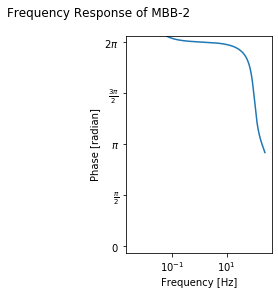

In [57]:
plt.subplot(122)
phase = 2 * np.pi + np.unwrap(np.angle(h))
plt.semilogx(f, phase)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radian]')
# ticks and tick labels at multiples of pi
plt.yticks(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
    ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.ylim(-0.2, 2 * np.pi + 0.2)
# title, centered above both subplots
plt.suptitle('Frequency Response of MBB-2')
# make more room in between subplots for the ylabel of right plot
plt.subplots_adjust(wspace=0.3)
plt.show()